In [3]:
from d3m_interface import Automl
import PipelineProfiler

In [4]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
%matplotlib inline

def live_plot(scores):
    clear_output(wait=True)
    BIGGER_SIZE = 30

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    width = 1.0 / len(scores) # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18,18))
    position = 0
    for i in range(len(scores)):
        color = (0.2, 0.4, 0.6, 0.6)
        if i % 2 == 0:
            color = (0.1, 0.1, 0.9, 0.6)
        rects = ax.bar(position, scores[i], width, color=color, edgecolor='red')
        position += width
           
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('f1 Performance ->')
    ax.set_xlabel('Epochs ->')
    ax.set_title('JIDO Search - Pipeline score evolution')
    ax.set_xticklabels([])

    plt.ylim([0,1.0])
    plt.show()  

### Generating pipelines

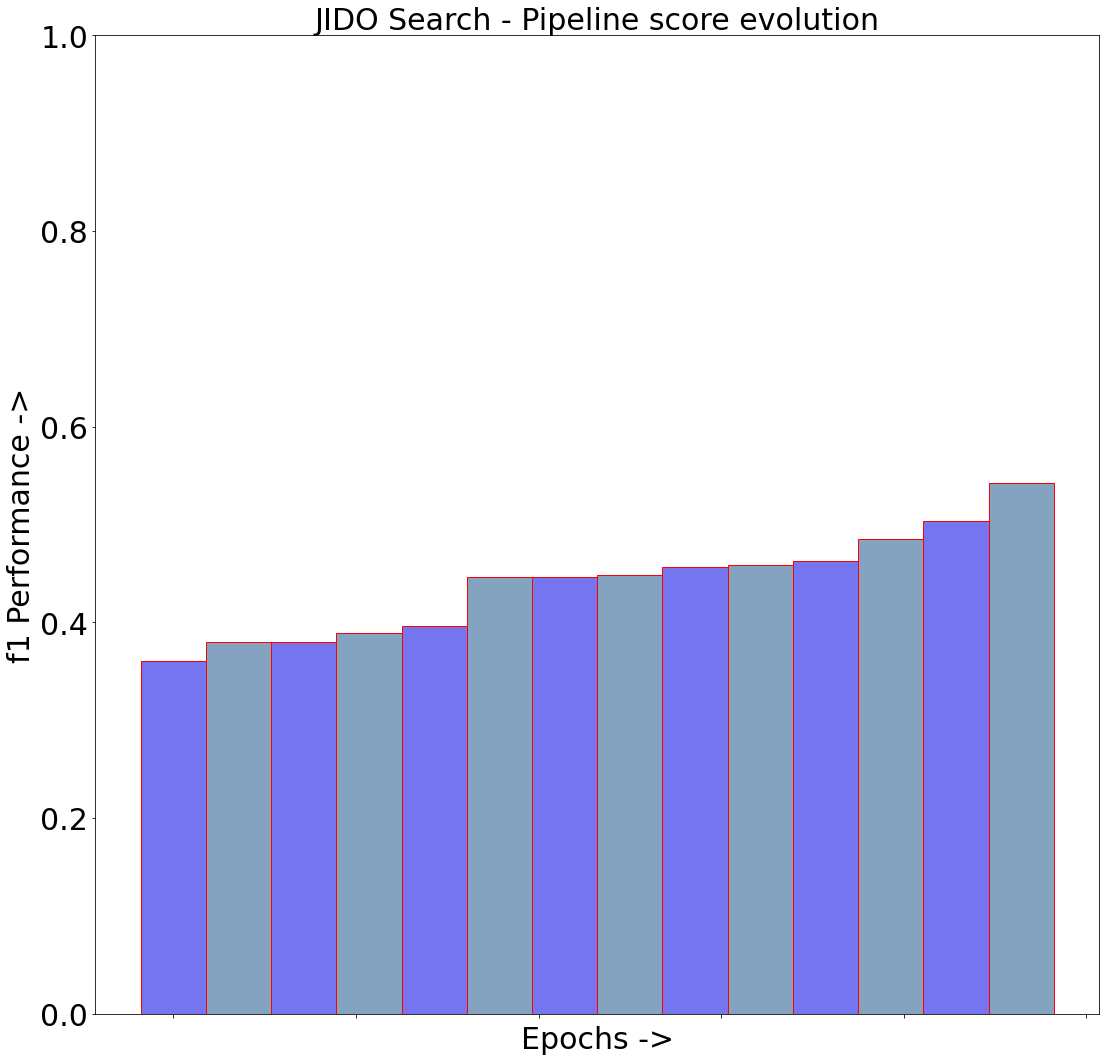

INFO: Ending session...
INFO: Session ended!


In [5]:
output_path = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/output/tmp/'
train_dataset = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/JIDO_SOHR_Articles_1061/TRAIN'
test_dataset = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/JIDO_SOHR_Articles_1061/TEST'
score_dataset = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/JIDO_SOHR_Articles_1061/SCORE'
#train_dataset = '/datasets/seed_datasets_current/185_baseball_MIN_METADATA/TRAIN'
#test_dataset = '/datasets/seed_datasets_current/185_baseball_MIN_METADATA/TEST'
#score_dataset = '/datasets/seed_datasets_current/185_baseball_MIN_METADATA/SCORE'
Automl.add_new_ta2('SRI', 'registry.gitlab.com/daraghhartnett/autoflow:latest') #Uncomment to add a new TA2
automl = Automl(output_path, 'SRI')

pipelines = automl.search_pipelines(train_dataset, time_bound=5)

import time
import numpy as np
for i in range(240):
    time.sleep(1)
    data = automl.get_latest_dynamic_plot_data()
    if len(data) > 0:
        data = sorted(data)
        data = list(dict.fromkeys(data))
        live_plot(data)
        
automl.end_session()

In [ ]:
automl.leaderboard

In [ ]:
model = automl.train('9bb93e0b-8811-4614-866e-86a255d54bdb')

In [ ]:
predictions = automl.test(model, test_dataset)

In [ ]:
predictions

In [ ]:
automl.score('9bb93e0b-8811-4614-866e-86a255d54bdb', score_dataset)

### Visualizing pipelines using Pipeline Profiler

In [ ]:
profiler_inputs = automl.create_profiler_inputs()

In [ ]:
PipelineProfiler.plot_pipeline_matrix(profiler_inputs)

In [ ]:
automl.end_session()